In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from itertools import cycle
warnings.filterwarnings('ignore')

## Data Understanding
Begin by examining the dataset to understand its structure and key characteristics. This includes the number of entries, column names, data types, and non-null counts. By doing this, you can quickly get a sense of the dataset's size and complexit.


## Initial Exploration and Missing Values Handling

Initial exploration involves a preliminary investigation into the dataset to uncover basic patterns, relationships, and potential anomalies. This phase helps form hypotheses and guide further, more detailed analysis.
* Identification: Check for missing values in each column using data. Isnull ().sum().
* Removal: Drop rows or columns with excessive missing values if imputation is not feasible.
* Imputation: Fill missing values using appropriate methods

In [2]:
#import csv file
pd.set_option('display.max_columns',None)
lap=pd.read_csv(r'S:\\laptop.csv')

In [3]:
lap.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
lap.isnull().sum()

Unnamed: 0          30
Company             30
TypeName            50
Inches              83
ScreenResolution    30
Cpu                 30
Ram                 44
Memory              30
Gpu                 30
OpSys               30
Weight              44
Price               30
dtype: int64

In [5]:
lap


,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298.0,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299.0,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300.0,Lenovo,Notebook,65.4,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301.0,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [145]:
#unique values
data.apply(lambda x:x.unique())

Company             [Apple, HP, Acer, Asus, Dell, Lenovo, Chuwi, M...
TypeName            [Ultrabook, Notebook, Gaming, 2 in 1 Convertib...
Inches              [13.3, 15.6, 15.4, 14.0, 12.0, 17.3, 13.5, 12....
ScreenResolution    [IPS Panel Retina Display 2560x1600, Full HD 1...
Cpu                 [Intel Core i5 2.3GHz, Intel Core i5 1.8GHz, I...
Ram                             [8.0, 14.0, 4.0, 2.0, 12.0, 6.0, 1.0]
Memory              [128GB SSD, 128GB Flash Storage, 256GB SSD, 51...
Gpu                 [Intel Iris Plus Graphics 640, Intel HD Graphi...
OpSys               [macOS, Windows 10, Mac OS X, Linux, Windows 1...
Weight              [1.37, 1.34, 1.86, 1.83, 2.1, 2.04, 1.3, 1.6, ...
Price               [71378.6832, 47895.5232, 30636.0, 135195.336, ...
dtype: object

In [7]:
data=lap.drop(['Unnamed: 0'],axis=1)

In [8]:
data

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,Lenovo,Notebook,65.4,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [9]:
data.loc[data['OpSys'] == 'macOS', 'Company'] = 'Apple'

In [10]:
data

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,Lenovo,Notebook,65.4,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [11]:
#null values
data.isnull().sum()

Company             30
TypeName            50
Inches              83
ScreenResolution    30
Cpu                 30
Ram                 44
Memory              30
Gpu                 30
OpSys               30
Weight              44
Price               30
dtype: int64

In [12]:
data['Company'].unique()


array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', nan, 'Chuwi',
       'MSI', 'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [13]:
data['TypeName'].unique()

array(['Ultrabook', 'Notebook', nan, 'Gaming', '2 in 1 Convertible',
       'Workstation', 'Netbook'], dtype=object)

In [14]:
data['Inches'].unique()

array(['13.3', '15.6', '15.4', '14', '12', nan, '17.3', '13.5', '12.5',
       '13', '18.4', '13.9', '11.6', '25.6', '35.6', '12.3', '27.3', '24',
       '33.5', '?', '31.6', '17', '15', '14.1', '11.3', '88.1', '21.8',
       '10.1', '75.7', '8.4', '2.1', '111.8', '89.2', '65.4'],
      dtype=object)

In [15]:
data['Inches'] = data['Inches'].replace('?', np.nan)

In [16]:
data['Inches'].unique()

array(['13.3', '15.6', '15.4', '14', '12', nan, '17.3', '13.5', '12.5',
       '13', '18.4', '13.9', '11.6', '25.6', '35.6', '12.3', '27.3', '24',
       '33.5', '31.6', '17', '15', '14.1', '11.3', '88.1', '21.8', '10.1',
       '75.7', '8.4', '2.1', '111.8', '89.2', '65.4'], dtype=object)

In [17]:
data=data.dropna(how='all')
data

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,Lenovo,Notebook,65.4,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [18]:
data.isnull().sum()

Company              0
TypeName            20
Inches              54
ScreenResolution     0
Cpu                  0
Ram                 14
Memory               0
Gpu                  0
OpSys                0
Weight              14
Price                0
dtype: int64

In [19]:
data['TypeName'].unique()

array(['Ultrabook', 'Notebook', 'Gaming', '2 in 1 Convertible',
       'Workstation', 'Netbook', nan], dtype=object)

In [20]:
data['TypeName'] = data['TypeName'].replace('Netbook', 'Notebook')

In [21]:
data['TypeName'].fillna('nan',inplace=True)

In [22]:
data.isnull().sum()

Company              0
TypeName             0
Inches              54
ScreenResolution     0
Cpu                  0
Ram                 14
Memory               0
Gpu                  0
OpSys                0
Weight              14
Price                0
dtype: int64

In [23]:
data['Inches'].value_counts()

Inches
15.6     615
14       184
13.3     155
17.3     148
12.5      31
11.6      31
12         6
13.9       6
12.3       5
13.5       5
15.4       4
15         4
35.6       3
10.1       2
24         2
13         2
27.3       1
21.8       1
89.2       1
111.8      1
2.1        1
8.4        1
75.7       1
88.1       1
25.6       1
11.3       1
14.1       1
18.4       1
17         1
31.6       1
33.5       1
65.4       1
Name: count, dtype: int64

In [24]:
#changes values and values where replaced in cycle manner
data['Inches'] = pd.to_numeric(data['Inches'], errors='coerce')
data['Inches'] = data['Inches'].mask(data['Inches'] > 21.8, np.nan)
replacement_values = [15.6, 14, 13.3,17.3]
replacement_cycle = cycle(replacement_values)
def replace_nans(series, replacements):
    return series.apply(lambda x: next(replacements) if pd.isna(x) else x)
data['Inches'] = replace_nans(data['Inches'], replacement_cycle)              

In [25]:
data['Inches'].value_counts()

Inches
15.6    632
14.0    201
13.3    172
17.3    165
12.5     31
11.6     31
13.9      6
12.0      6
13.5      5
12.3      5
15.4      4
15.0      4
13.0      2
10.1      2
18.4      1
17.0      1
14.1      1
11.3      1
21.8      1
8.4       1
2.1       1
Name: count, dtype: int64

In [26]:
data.isnull().sum()

Company              0
TypeName             0
Inches               0
ScreenResolution     0
Cpu                  0
Ram                 14
Memory               0
Gpu                  0
OpSys                0
Weight              14
Price                0
dtype: int64

In [27]:
data['Ram'].value_counts()

Ram
8GB     594
4GB     362
16GB    194
6GB      39
12GB     24
2GB      22
32GB     17
64GB      3
24GB      3
1GB       1
Name: count, dtype: int64

In [28]:
replace_values = ['8GB','4GB']
replace_cycle = cycle(replace_values)
def replace_nan(series, replacements):
    return series.apply(lambda x: next(replacements) if pd.isna(x) else x)
data['Ram'] = replace_nan(data['Ram'], replace_cycle)  

In [29]:
data.isnull().sum()

Company              0
TypeName             0
Inches               0
ScreenResolution     0
Cpu                  0
Ram                  0
Memory               0
Gpu                  0
OpSys                0
Weight              14
Price                0
dtype: int64

In [30]:
data['Weight'].value_counts()

Weight
2.2kg     109
2.1kg      55
2.4kg      42
2.3kg      40
2.5kg      37
         ... 
9kg         1
4.33kg      1
0.91kg      1
1.79kg      1
4.0kg       1
Name: count, Length: 196, dtype: int64

In [31]:
# replacing the weight by cycle replacement
replace_weight = ['2.2kg', '2.1kg', '2.4kg', '2.3kg', '2.5kg']
replace_cycles = cycle(replace_weight)
def replace_value(series, replacements):
    return series.apply(lambda x: next(replacements) if pd.isna(x) else x)
data['Weight'] = replace_value(data['Weight'], replace_cycles)

In [32]:
data.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [33]:
data['ScreenResolution'].unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', '1600x900',
       'IPS Panel 4K Ultra HD 3840x2160', '4K Ultra HD 3840x2160',
       'Touchscreen 1366x768', 'Touchscreen 2560x1440',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel Quad HD+ 3200x1800',
       'IPS Panel Qua

In [34]:
# adding values
import re
def is_resolution_only(value):
    return bool(re.match(r'^\d{3,4}x\d{3,4}$', value))
prefix = 'Full HD'
data['ScreenResolution'] = data['ScreenResolution'].apply(lambda x: f'{prefix} {x}' if is_resolution_only(x) else x)


In [35]:
data['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                498
Full HD 1366x768                                 274
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         52
Full HD / Touchscreen 1920x1080                   45
Full HD 1600x900                                  23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  14
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160                9
4K Ultra HD 3840x2160                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
Touchscreen 2560x1440                              6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [36]:
data['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz     183
Intel Core i7 7700HQ 2.8GHz    142
Intel Core i7 7500U 2.7GHz     128
Intel Core i7 8550U 1.8GHz      72
Intel Core i5 8250U 1.6GHz      68
                              ... 
AMD A9-Series 9420 2.9GHz        1
Intel Core i7 2.2GHz             1
AMD A6-Series 7310 2GHz          1
Intel Atom Z8350 1.92GHz         1
AMD E-Series 9000e 1.5GHz        1
Name: count, Length: 118, dtype: int64

In [37]:
data['Memory'].value_counts()

Memory
256GB SSD                        401
1TB HDD                          217
500GB HDD                        130
512GB SSD                        116
128GB SSD +  1TB HDD              92
128GB SSD                         74
256GB SSD +  1TB HDD              71
32GB Flash Storage                37
2TB HDD                           16
64GB Flash Storage                14
512GB SSD +  1TB HDD              14
1TB SSD                           13
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          4
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
128GB SSD +  2TB HDD               2
256GB SSD +  500GB HDD             2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [38]:
data['Memory'] = data['Memory'].replace('?', 'nan')

In [39]:
data['Weight'] = data['Weight'].replace('?', '2.2Kg')

In [40]:
data['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      271
Intel HD Graphics 520      181
Intel UHD Graphics 620      66
Nvidia GeForce GTX 1050     64
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [41]:
data['OpSys'].value_counts()

OpSys
Windows 10      1047
No OS             63
Linux             61
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            1
Name: count, dtype: int64

In [42]:
data['OpSys'].fillna('No OS', inplace=True)

In [43]:
#changing the values of no os
def set_opsys(company, opsys):
    if opsys == 'No OS':
        if company == 'Apple':
            return 'macOS'
        else:
            return 'Windows 10'
    else:
        return opsys

data['OpSys'] = data.apply(lambda row: set_opsys(row['Company'], row['OpSys']), axis=1)

In [44]:
data['Price'].value_counts()

Price
79866.720    14
95850.720    14
58554.720    14
69210.720    11
63882.720    11
             ..
16197.120     1
40439.520     1
98994.240     1
61485.120     1
28992.312     1
Name: count, Length: 777, dtype: int64

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   float64
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   object 
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   object 
 10  Price             1273 non-null   float64
dtypes: float64(2), object(9)
memory usage: 119.3+ KB


## Feature engineering

In the feature engineering process, we created a new column called Touchscreen in the dataset. This column indicates whether a laptop has a touchscreen based on the ScreenResolution column. Specifically, we used a condition to check if the ScreenResolution contains the word 'touchscreen' (ignoring case). If it does, we set the Touchscreen value to 'yes'; otherwise, we set it to 'no'. This new feature helps us easily identify and analyze the presence of touchscreens in different laptop models

In [146]:
data['Touchscreen'] = np.where(data['ScreenResolution'].str.contains('touchscreen', case=False, na=False), 'yes', 'no')

In [147]:
data

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,no
1,Apple,Ultrabook,13.3,Full HD 1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,no
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,Windows 10,1.86,30636.0000,no
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,14.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,no
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,no
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4.0,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,yes
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,14.0,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,yes
1300,Lenovo,Notebook,17.3,Full HD 1366x768,Intel Celeron Dual Core N3050 1.6GHz,2.0,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,no
1301,HP,Notebook,15.6,Full HD 1366x768,Intel Core i7 6500U 2.5GHz,6.0,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,no


## Outlier Handling:
Handling outliers is a critical step in data preprocessing because outliers can significantly skew and mislead the results of your analysis. The method that's been used here is iqr method where the upper limit and lower limit values found and capping where used from those limits.

In [157]:
#display
numeric=data[['Inches','Ram','Price','Weight']]
numeric

,Inches,Ram,Price,Weight
0,13.3,8.0,71378.6832,1.37
1,13.3,8.0,47895.5232,1.34
2,15.6,8.0,30636.0000,1.86
3,15.4,14.0,135195.3360,1.83
4,13.3,8.0,96095.8080,1.37
...,...,...,...,...
1298,14.0,4.0,33992.6400,1.80
1299,13.3,14.0,79866.7200,1.30
1300,17.3,2.0,12201.1200,1.50
1301,15.6,6.0,40705.9200,2.19


In [48]:
data['Ram']

0        8
1        8
2        8
3       16
4        8
        ..
1298     4
1299    16
1300     2
1301     6
1302     4
Name: Ram, Length: 1273, dtype: int64

In [49]:
data['Weight'] = pd.to_numeric(data['Weight'].str.replace('kg', '', case=False))


In [50]:
data['Weight']

0       1.37
1       1.34
2       1.86
3       1.83
4       1.37
        ... 
1298    1.80
1299    1.30
1300    1.50
1301    2.19
1302    2.20
Name: Weight, Length: 1273, dtype: float64

In [115]:
views=data.copy()

### IQR method for handling outliers

In [155]:
# by using iqr capping method outliers are handled
columns=['Inches','Ram','Weight']
def iqr_capping(df,cols,factor):
    for col in cols:
        q1=df[col].quantile(0.25)
        q3=df[col].quantile(0.75)
        iqr=q3-q1
        upper_wisk=q3+(factor*iqr)
        lower_wisk=q1-(factor*iqr)
        df[col]=np.where(df[col]>upper_wisk,upper_wisk,
                 np.where(df[col]<lower_wisk,lower_wisk,df[col]))

In [123]:
iqr_capping(data,columns,1.5)

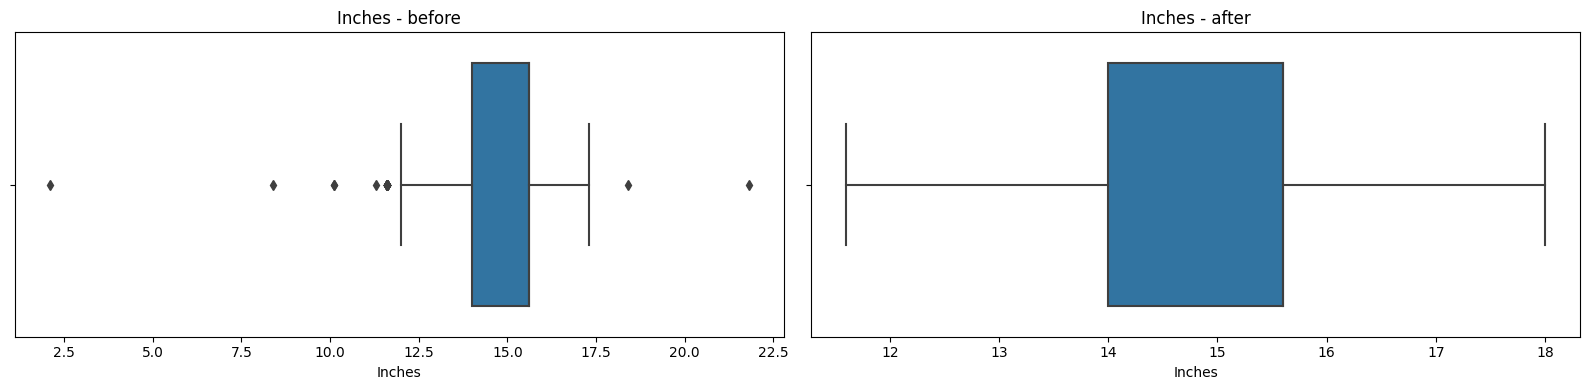

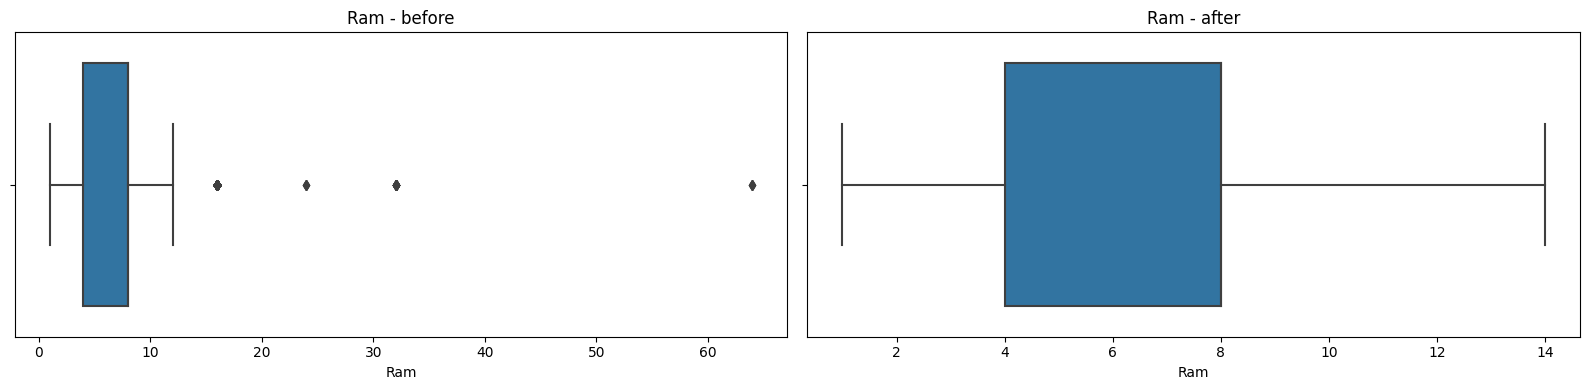

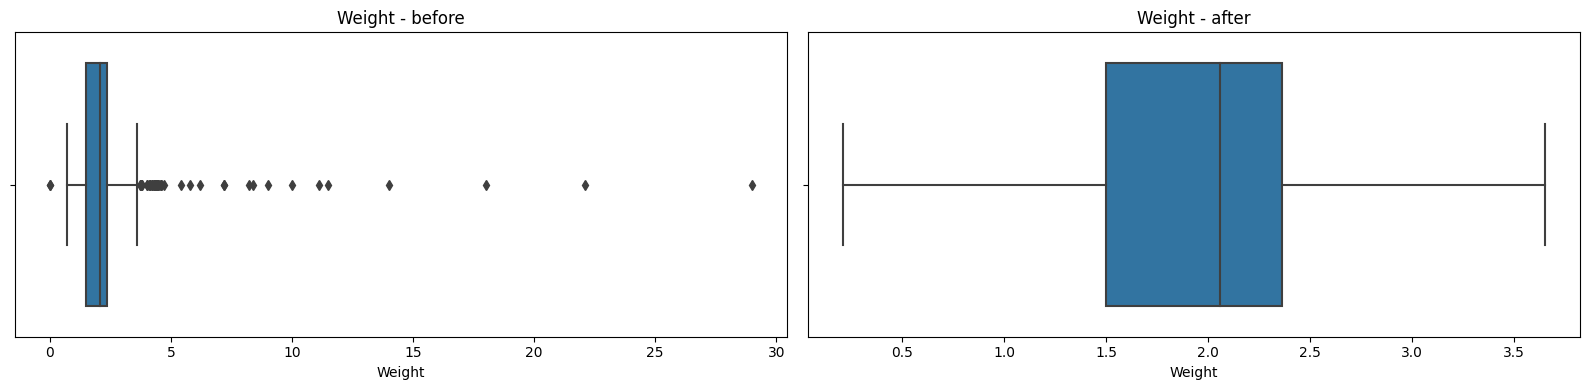

In [154]:
#comparision between before and after the outliers
for col in columns:
    plt.figure(figsize=(16, 4))
    
    plt.subplot(1, 2, 1) 
    sns.boxplot(x=views[col])
    plt.title(f'{col} - before')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.title(f'{col} - after')
    
    plt.tight_layout()
    plt.show()

Text(0.5, 1.0, 'Price')

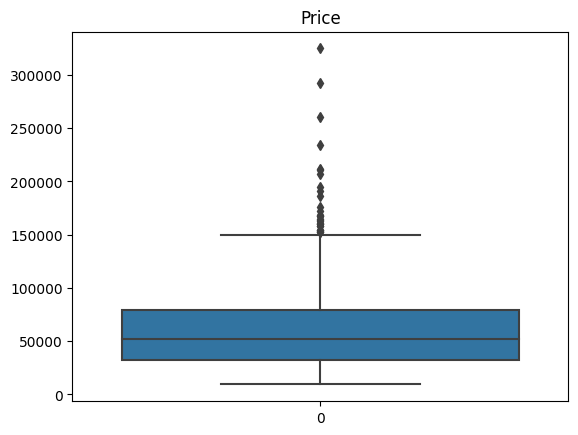

In [125]:
sns.boxplot(data['Price'])
plt.title('Price')

In [153]:
#calculatiing upper_limit and lower_limit for the price column by iqr method
q1=data['Price'].quantile(0.25)
q3=data['Price'].quantile(0.75)
iqr=q3-q1
upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)

In [152]:
#outliers that are in price column
data.loc[(data['Price']>upper_limit) | (data['Price']<lower_limit)]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
17,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.9GHz,14.0,512GB SSD,AMD Radeon Pro 560,macOS,1.83,152274.2400,no
196,Razer,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK 2.9GHz,14.0,1TB SSD,Nvidia GeForce GTX 1080,Windows 10,3.49,324954.7200,yes
204,Dell,Workstation,15.6,4K Ultra HD 3840x2160,Intel Xeon E3-1505M V6 3GHz,14.0,256GB SSD + 1TB HDD,Nvidia Quadro M1200,Windows 10,2.80,162770.4000,no
238,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7820HK 2.9GHz,14.0,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1080,Windows 10,3.65,207259.2000,no
247,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7820HK 2.9GHz,14.0,256GB SSD,Nvidia GeForce GTX 1080,Windows 10,3.60,159786.7200,no
297,Dell,Workstation,17.3,Full HD 1920x1080,Intel Core i7 7820HQ 2.9GHz,14.0,256GB SSD,Nvidia Quadro M1200,Windows 10,3.42,153705.3408,no
517,Asus,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,14.0,512GB SSD,Nvidia GeForce GTX1080,Windows 10,2.24,158135.0400,no
530,Dell,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,14.0,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,3.65,160520.3856,no
563,Lenovo,Notebook,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8.0,256GB SSD,Nvidia Quadro M620M,Windows 10,3.40,159786.7200,no
610,Lenovo,Notebook,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Xeon E3-1535M v6 3.1GHz,14.0,1TB SSD,Nvidia Quadro M2200M,Windows 10,2.50,261018.7200,no


### Visualization
Visualization is a powerful tool for exploring data, identifying patterns, spotting anomalies, and communicating findings effectively.

## univariate analysis

In [129]:
columnr=['Inches','Ram','Weight','Price']

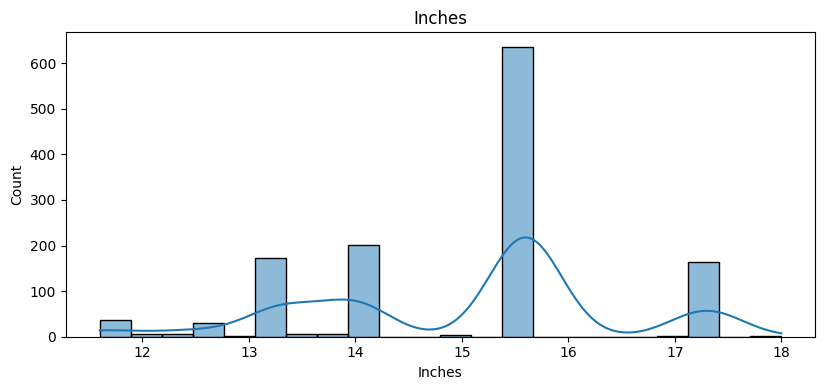

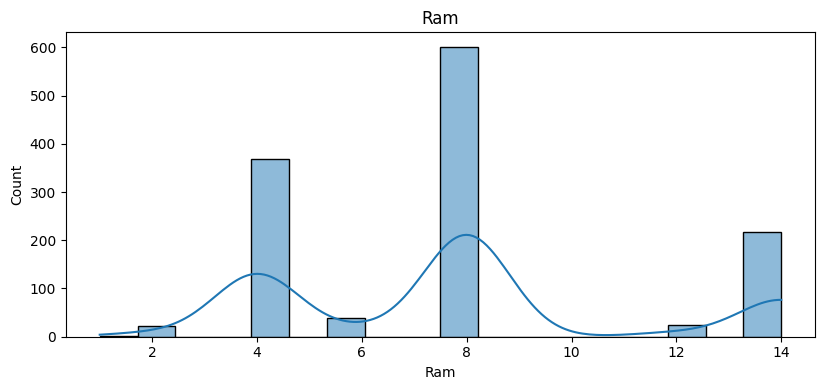

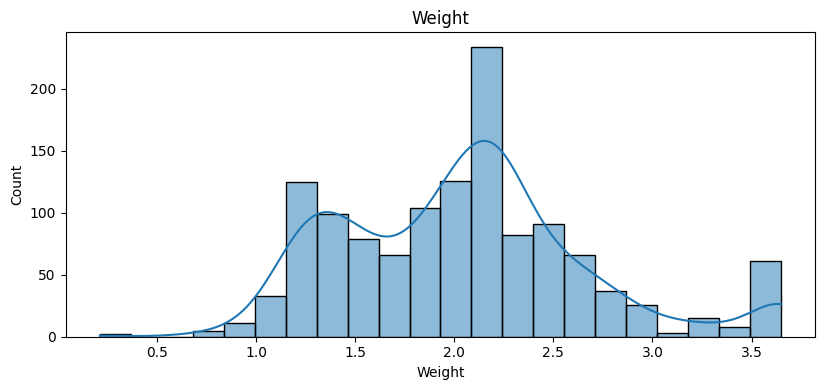

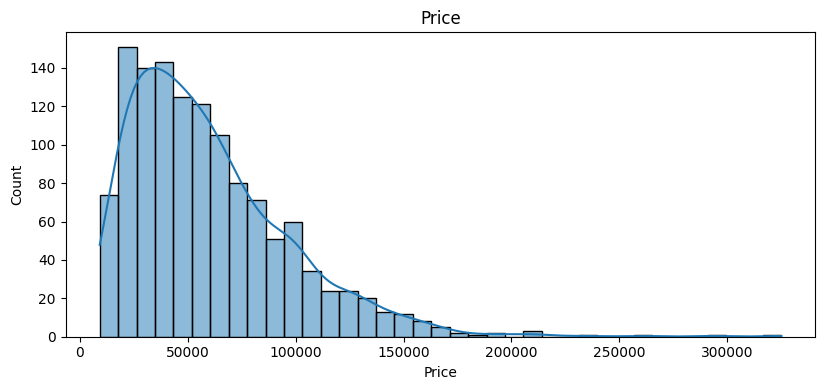

In [148]:
#histogram for numeric columns
for col in columnr:
    plt.figure(figsize=(16, 4))
    
    plt.subplot(1, 2, 2) 
    sns.histplot(data=data, x=col, kde=True)  
    plt.title(f'{col}')
    
    plt.tight_layout()
    plt.show()



Univariate analysis refers to the statistical analysis of a single variable at a time. It involves examining the distribution, central tendency, and variability of individual variables without considering their relationships with other variables

### Bivariate analysis

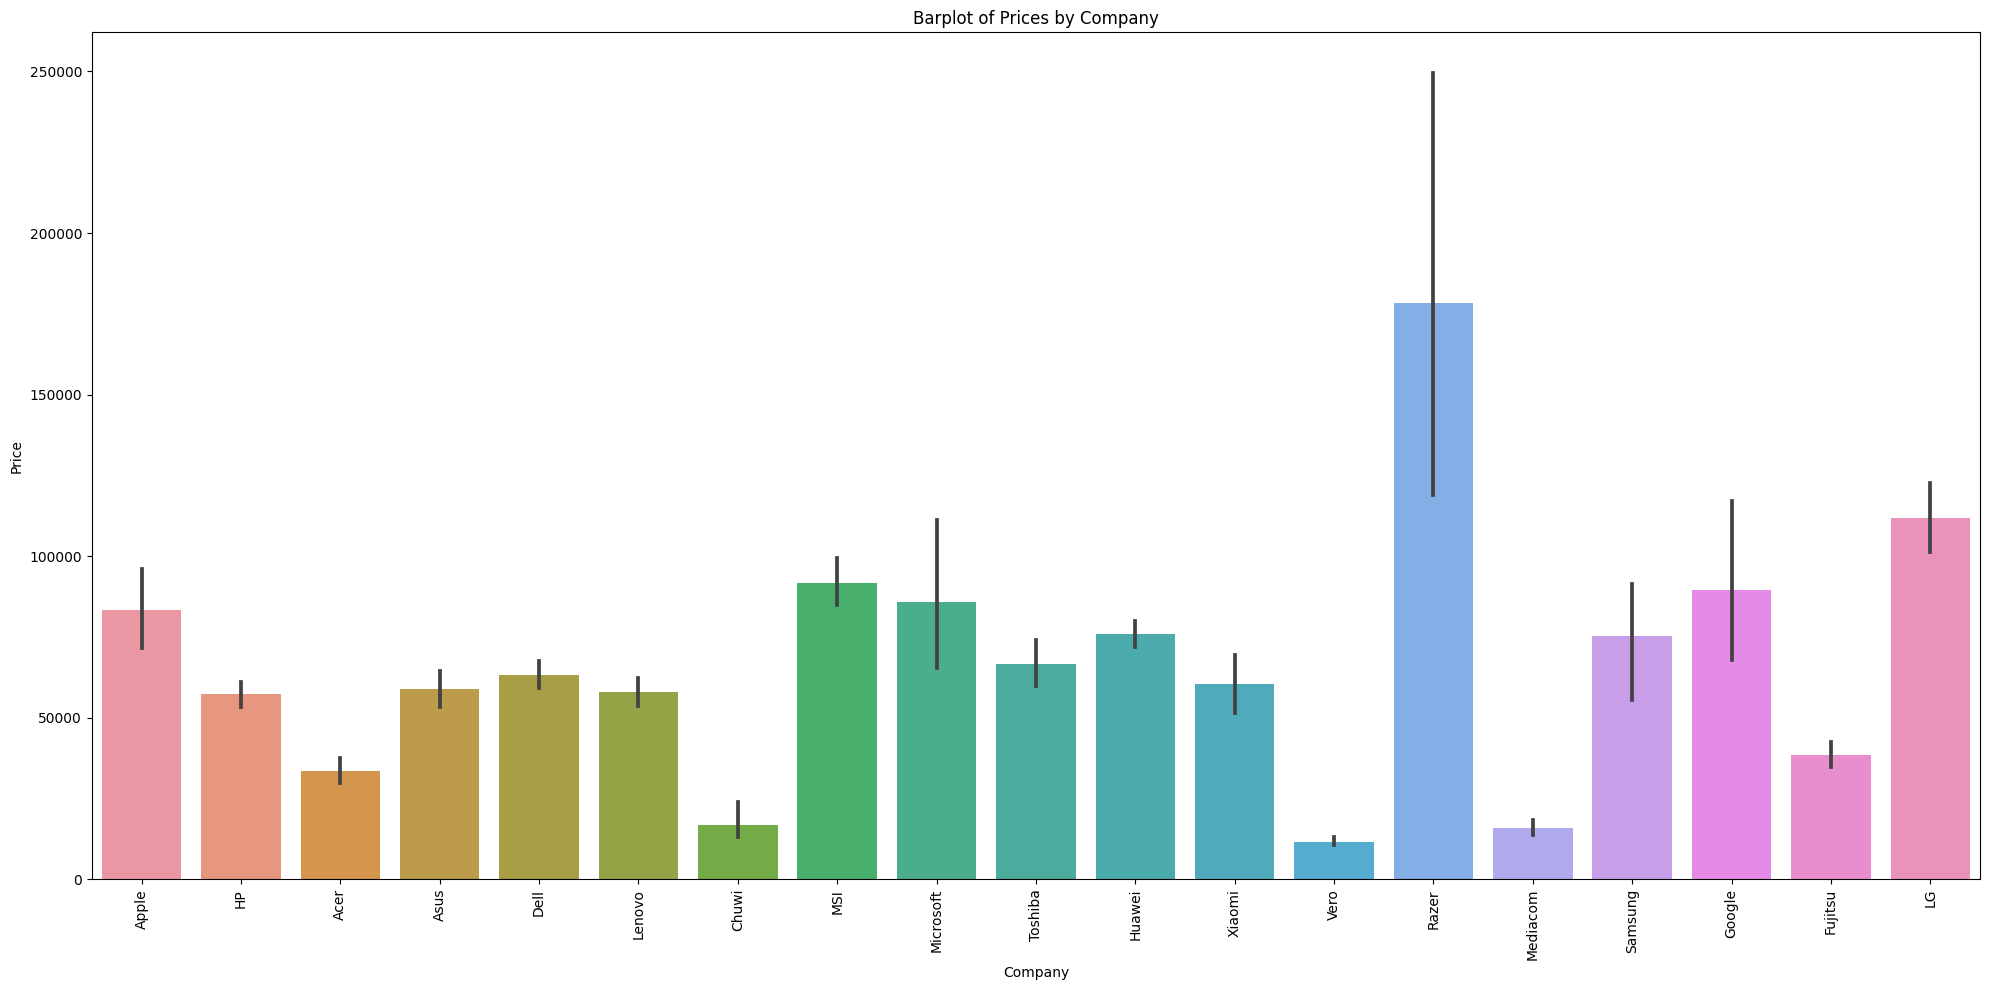

In [149]:
#barplot between Company and Price
plt.figure(figsize=(20, 10))

sns.barplot(x='Company', y='Price', data=data)

plt.xticks(rotation=90)

plt.title('Barplot of Prices by Company')
plt.xlabel('Company')
plt.ylabel('Price')

plt.tight_layout()
plt.show()


for eg: In here the razer company has the laptops that are higher in price

### Multivariate analysis

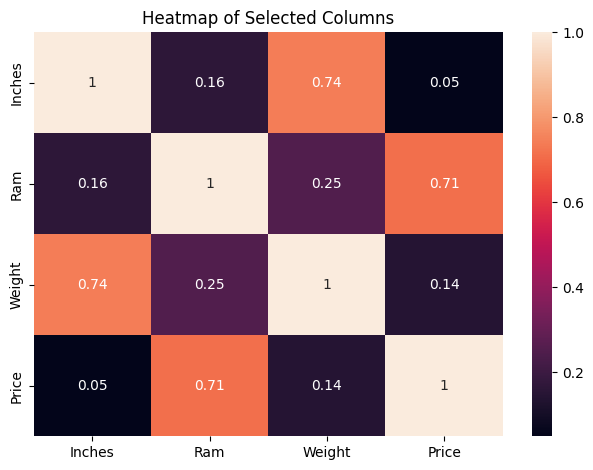

In [142]:
#heatmap for slected columns
col=['Inches','Ram','Weight','Price']
data_sub=data[col]
sns.heatmap(data_sub.corr(), annot=True)
plt.title('Heatmap of Selected Columns')

plt.tight_layout()
plt.show()

Heatmap is to check correlation between all  the columns where correlation can vary from -1 to 1 where -1 means strong negative and +1 means strong positive correlation

### Segmented univariate analysis

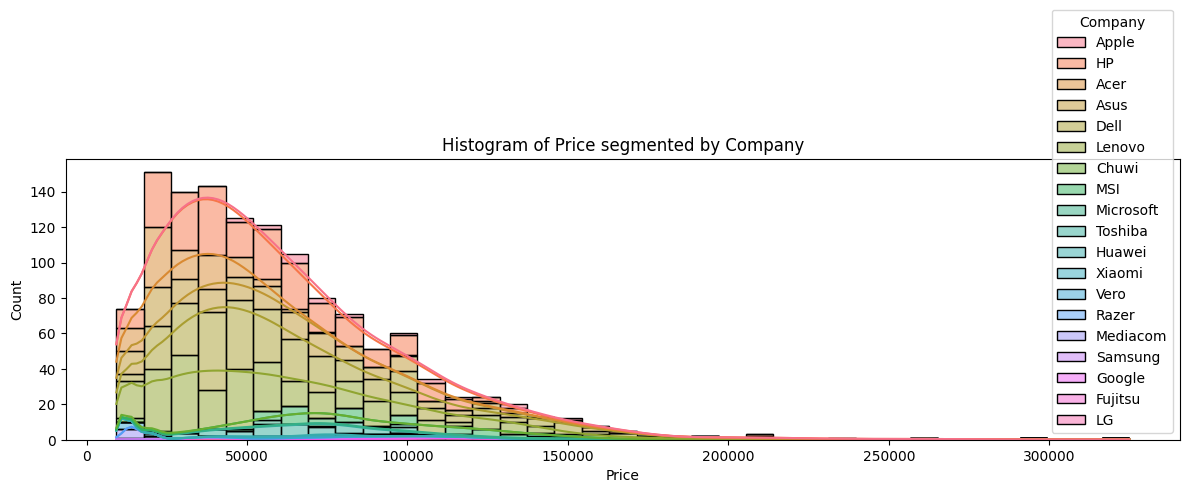

In [144]:
# Create a segmented univariate analysis
def segmented_univariate_analysis(data, numeric_col, segment_col):
    plt.figure(figsize=(12, 8))
    
    # Histogram to show distribution of numeric_col segmented by segment_col
    plt.subplot(2, 1, 2)
    sns.histplot(data, x=numeric_col, hue=segment_col, multiple="stack", kde=True)
    plt.title(f'Histogram of {numeric_col} segmented by {segment_col}')
    
    plt.tight_layout()
    plt.show()

segmented_univariate_analysis(data, numeric_col='Price', segment_col='Company')


Segmented univariate analysis is particularly for understanding how the distribution or characteristics of the variable change across diffrent categories